# **pyTorch (파이토치)**



## 개요
- https://pytorch.org/
- python/C++/Java을 딥러닝 구현을 위한 오픈소스 라이브러리
- GPU 지원은 ndivia만 가능(CUDA만 사용가능)
- Lua(루아, 핵심사용언어),C++ 등을 개발
- 아직까지는 텐서플로우가 더 많이 사용되나, 점차 확산을 하고 있는 추세
- Facebook 인공지능팀 개발(=뉴욕대 협업)
- 딥러닝 프레임워크(엔진)
- 장점
  - 복잡, 계산양이 큰 그래프를 쉽게 구성한다
  - 계산그래프를 활용하면 미분/적분도 간단하게 처리
  - GPU연산을 손쉽게 활용하여 빠른 처리가 가능


## 특징

- numpy을 기반으로 Tensor 연산을 GPU로 수행가능
- 자동 미분 시스템을 이용하여, 모델을 손쉽게 구성
- 같이 활용되는 python 패키지
  - Scipy
  - Numpy
  - Cython:파이썬의 빠른 생산성, 외부 C라이브러리와 간결하게 연동, 실행속도를 향상
- 학습, 추론 속도가 빠르다, 다루기도 쉽다


## pyTorch vs Tensorflow

- 2019년도 기준, 2위(pyTorch), 1위(Tensorflow)
- Tensorflow
  - Define-and-Run 방식
    1. 계산 그래프, 데이터 플로우 그래프를 설계
    2. 세션(session)에 그래프에 들어간 데이터(수치, 숫자)를 주입
    3. 세션 실행
  - 산업용
- pyTorch
  - Define-by-Run 방식
    1. 계산 그래프를 그리는 동시에
    2. 주입할 데이터를 보관하고
    3. 연산 실행을 바로 가능하다
  - 학계/연구용 주로 사용, 2018년에 1.0 런칭 이후 산업용으로 넓히는 중


In [0]:
import torch

In [0]:
#로컬 PC나 딥러닝 서버에서 사용한다면 https://pytorch.org/ 사이트에서 본인의 환경에 맞게 시뮬레이션하면 설치 명령이 나옴
import numpy as np
import matplotlib.pyplot as plt

## 텐서

- 딥러닝은 텐서를 기반으로 진행되는 계산(연산)의 연속
- 딥러닝 구현상 가장 중요한 기본 단위

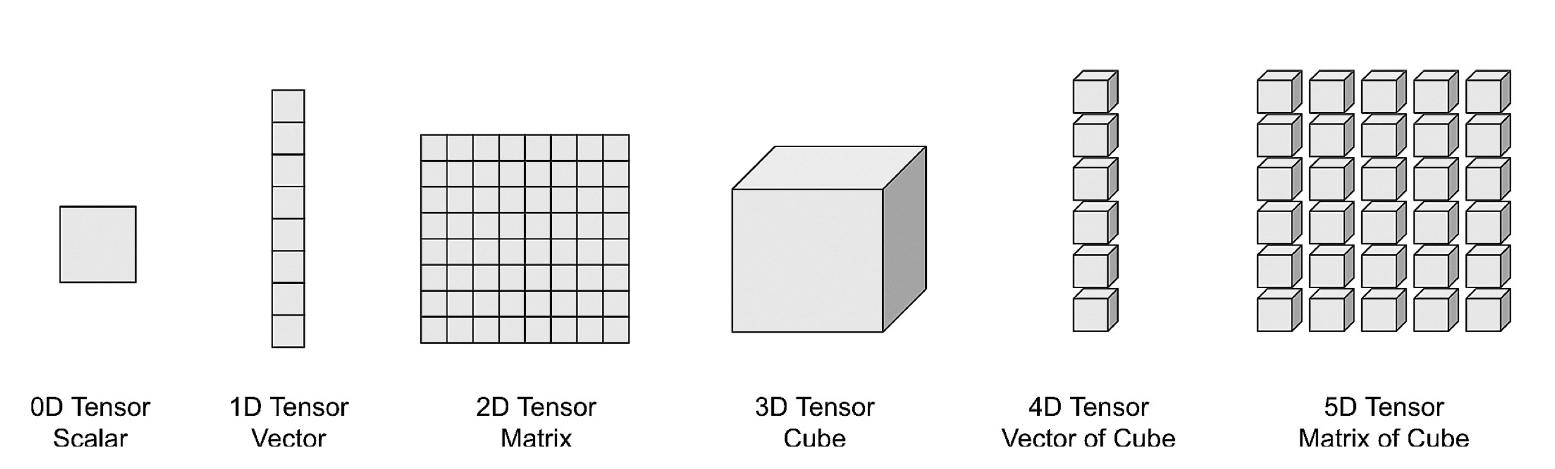

In [0]:
from IPython.display import Image
Image('/content/8.tensor.jpeg',width=400)

# 텐서 생성

- Tensor(리스트 or 배열)
  - 원소가 정수에서 float32로 자동 변환
  - 단, 옵션에 따라 유지될 수도 있지 않을까?

In [0]:
#리스트로부터 텐서 생성
list_src=[[10,11,12],[20,21,22]] # (2,3) or 2x3
#텐서생성
x=torch.Tensor(list_src)
x
#define by run이라는 취지에서 이미 텐서에 데이터가 설정되어 있음을 알 수 있다


tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
#복원:텐서->리스트 추출 : to
x.tolist()

[[10.0, 11.0, 12.0], [20.0, 21.0, 22.0]]

In [0]:
#numpy의 ndarray(배열)을 재료로 텐서 생성
arr=np.array(x.tolist())
arr

array([[10., 11., 12.],
       [20., 21., 22.]])

In [0]:
x=torch.Tensor(arr)
x

tensor([[10., 11., 12.],
        [20., 21., 22.]])

In [0]:
#복원->타입복구가 불가
x.numpy()

array([[10., 11., 12.],
       [20., 21., 22.]], dtype=float32)

# GPU 사용

- colab에서 수정->노트설정->하드웨어 가속기 gpu 사용으로 변경
  - 런타임이 다 초기화 됨

## pyTorch GPU 사용

In [0]:
type(x)

torch.Tensor

In [0]:
x.device

device(type='cpu')

In [0]:
#NDIVIA
device='cuda'
try:
  x=x.to(device)
  print('%s 지원'%device)
except Exception as e:
  print('%s 미지원'%device,e)

cuda 지원


In [0]:
x.device

device(type='cuda', index=0)

In [0]:
#이 텐서는 GPU에서 연산 -> 텐서별로 GPU,CPU를 지정할 수 있다
x.device

device(type='cuda', index=0)

In [0]:
#텐서를 cpu연산으로 변경 처리
x=x.to('cpu')
x.device

device(type='cpu')

## Tensorflow GPU 사용

In [0]:
import tensorflow as tf
#지원되는 하드웨어
from tensorflow.python.client import device_lib

In [0]:
#지원되는 하드웨어 목록 중에서
#device_type: 'GPU'찾고
#name:"/device:GPU:0"이 이름을 챙겨둔다
#memory_limit:17179869184등 메모리 제한크기를 확인하여 차후 학습시 batch_size에 대한 가이드 판단
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10326987589336210337, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16461807714224172072
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16737041452025107862
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14224857498
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13283537715278695971
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
#GPU연산
#통상 Session이 열려진 지점부터 사용
#여기서는 간단하게 표현만 확인
with tf.device('/device:GPU:0'):
  a=tf.constant([[1,2,3],[4,5,6]]) #2x3
  b=tf.constant([[1,2],[3,4],[5,6]]) #3x2
  c=tf.matmul(a,b)
  print(c)
#데이터 플로우 그래프 실행
  # with tf.Session() as sess:
  #   try:
  #     print(sess.run(c))
  #   except Exception as e:
  #     print(e)
  #     pass

In [0]:
#GPU연산
#통상 Session이 열려진 지점부터 사용
#여기서는 간단하게 표현만 확인
with tf.device('/CPU:0'):
  a=tf.constant([[1,2,3],[4,5,6]]) #2x3
  b=tf.constant([[1,2],[3,4],[5,6]]) #3x2
  c=tf.matmul(a,b)
  print(c)
#데이터 플로우 그래프 실행

Tensor("MatMul_1:0", shape=(2, 2), dtype=int32, device=/device:CPU:0)


## keras GPU 사용

In [0]:
from keras import backend as K

In [0]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
sess = tf.Session()
from keras.backend import tensorflow_backend as K
#메모리가 부족하면 자동적으로 증가:
#GPU의 메모리를 작업에 올인해서 사용하는가?
#일부만 사용하다가 부족하면 증설하는가?
config=tf.ConfigProto()
config.gpu_options.allow_growth=True
K.set_session(tf.Session(config=config))

with tf.device('/device:GPU:0'):
  pass

sess.close()

# 텐서 생성 2

- 랜덤 텐서

In [0]:
# 0-1사이로 랜덤하게, 2x3 행렬을 생성해라
#인자중에 *size -> [가변인자], shape을 설명하는
torch.rand(2,3)

tensor([[0.3137, 0.7024, 0.0662],
        [0.2683, 0.3229, 0.7531]])

In [0]:
#0-8까지 랜덤 2x3, 정수로
torch.randint(low=0,high=8,size=(2,3))

tensor([[1, 2, 6],
        [2, 3, 7]])

In [0]:
#제로텐서
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [0]:
x=torch.ones(3,3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
#매개변수의 x의 shape과 동일한 텐서를 만들고 0으로 채운다
torch.zeros_like(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [0]:
torch.ones_like(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [0]:
#gpu를 이용하여 처리한다면
# torch.zeros_like(x.cuda())

# 텐서의 타입

In [0]:
from IPython.display import Image
Image('/content/8.torch_type.png',width=400)

In [0]:
#실수형 텐서
a=torch.FloatTensor(np.array([1,2,3,4]))
a, type(a), a.type()
#파이토치에서 타입 확인은 : xxxx.type()

(tensor([1., 2., 3., 4.]), torch.Tensor, 'torch.FloatTensor')

In [0]:
#정수형 텐서
a=torch.LongTensor(np.array([1,2,3,4]))
a, type(a), a.type()
#파이토치에서 타입 확인은 : xxxx.type()

(tensor([1, 2, 3, 4]), torch.Tensor, 'torch.LongTensor')

In [0]:
#불린형 텐서
a=torch.BoolTensor(np.array([True, False,True]))
a, type(a), a.type()
#파이토치에서 타입 확인은 : xxxx.type()

(tensor([ True, False,  True]), torch.Tensor, 'torch.BoolTensor')

# 텐서조작(행렬 조작)

- slicing
- view
- transpose
- squeeze, unsqeeze
- cat, stack
- 사칙연산(+ - *)
- sum, mean
- max, argmax,min,argmin
- 논리연산

In [0]:
# 씨드(seed) 고정 -> 발생되는 난수의 순서 고정 -> 실험시 유용하게 변수(상황) 통제
torch.manual_seed(512) #임의설정값

In [0]:
#크기 2x3x4 인 3차(3D) Tensor(=cube), 값은 0-9까지 정수로 생성
x=torch.randint(0,10,size=(2,3,4))
x

tensor([[[5, 0, 4, 2],
         [3, 3, 2, 5],
         [6, 4, 3, 5]],

        [[4, 8, 2, 1],
         [7, 7, 8, 3],
         [4, 0, 7, 2]]])

In [0]:
#인덱싱
x[0]

tensor([[5, 0, 4, 2],
        [3, 3, 2, 5],
        [6, 4, 3, 5]])

In [0]:
#인덱싱은 전형적인 표현, [1차,2차,3차...] 이렇게도 표현 가능
x[0][0],x[0,0], x[0,0,0]

(tensor([5, 0, 4, 2]), tensor([5, 0, 4, 2]), tensor(5))

In [0]:
len(x)

2

In [0]:
# 텐서의 시각화 함수
# src : Tensor
def drawTensor( src ):
  fig, axes = plt.subplots( len(src), 1 )
  for i in range( len(src) ):
    # src.numpy() : 텐서를 배열로 복원
    axes[i].matshow( src.numpy()[i], vmin=0, vmax=1, cmap='gray' )
  plt.show()
  

In [0]:
#시각화할 텐서 준비
tmp=torch.ones_like(x)
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

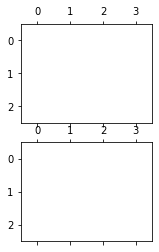

In [0]:
#기본 tm을 드로잉, 1이면 흰색
drawTensor(tmp)

In [0]:
tmp[0,2,3]=0
tmp

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

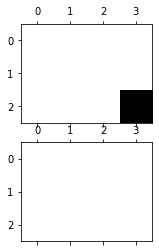

In [0]:
drawTensor(tmp)

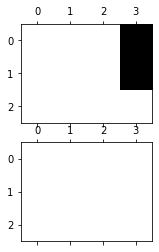

In [0]:
tmp=torch.ones_like(x)
#차원별로 변경된 부분은 검토하면 간단하게 해결
#1차원 -> 2차원 -> 3차원
tmp[0,:2,3]=0
drawTensor(tmp)

## 인덱싱, 슬라이싱, 원본조작, 시각화
- 텐서에서 특징 정보를 추출, 변경할 경우
- 인덱싱(차원축소) or 슬라이싱을 통해서 처리가 가능
- 표현
  - 텐서명[1차,2차,3차...]

## view

- 텐서의 shape을 변경(=reshape)

In [0]:
x.shape, x, x.dtype, x.ndim

(torch.Size([2, 3, 4]), tensor([[[5, 0, 4, 2],
          [3, 3, 2, 5],
          [6, 4, 3, 5]],
 
         [[4, 8, 2, 1],
          [7, 7, 8, 3],
          [4, 0, 7, 2]]]), torch.int64, 3)

In [0]:
#쉐입 변경
x.reshape(2,2,6)

tensor([[[5, 0, 4, 2, 3, 3],
         [2, 5, 6, 4, 3, 5]],

        [[4, 8, 2, 1, 7, 7],
         [8, 3, 4, 0, 7, 2]]])

In [0]:
x.view(2,2,6)

tensor([[[5, 0, 4, 2, 3, 3],
         [2, 5, 6, 4, 3, 5]],

        [[4, 8, 2, 1, 7, 7],
         [8, 3, 4, 0, 7, 2]]])

In [0]:
# -1을 사용한다면->몇개 나올지 모르겠다. 알아서 맞춰달라
x.view(-1,1,12)

tensor([[[5, 0, 4, 2, 3, 3, 2, 5, 6, 4, 3, 5]],

        [[4, 8, 2, 1, 7, 7, 8, 3, 4, 0, 7, 2]]])

## transpose

- 차원의 맞교환

In [0]:
x.shape, x

(torch.Size([2, 3, 4]), tensor([[[5, 0, 4, 2],
          [3, 3, 2, 5],
          [6, 4, 3, 5]],
 
         [[4, 8, 2, 1],
          [7, 7, 8, 3],
          [4, 0, 7, 2]]]))

In [0]:
#첫번째 차원과 두번째 차원을 교환
tmp2 = x.transpose(0,1)
tmp2, tmp2.shape

(tensor([[[5, 0, 4, 2],
          [4, 8, 2, 1]],
 
         [[3, 3, 2, 5],
          [7, 7, 8, 3]],
 
         [[6, 4, 3, 5],
          [4, 0, 7, 2]]]), torch.Size([3, 2, 4]))

## squeeze, unsqueeze

- squeeze : 특정 차원을 제거
- unsqueeze : 특정 차원을 추가

In [0]:
x=torch.rand((2,1,3,4,1))
x

tensor([[[[[0.4517],
           [0.8893],
           [0.8744],
           [0.1333]],

          [[0.5319],
           [0.8076],
           [0.9430],
           [0.6255]],

          [[0.7627],
           [0.0588],
           [0.2323],
           [0.7088]]]],



        [[[[0.3247],
           [0.2385],
           [0.7563],
           [0.0430]],

          [[0.4563],
           [0.5675],
           [0.4011],
           [0.3236]],

          [[0.4114],
           [0.4181],
           [0.3150],
           [0.5132]]]]])

In [0]:
x.shape

torch.Size([2, 1, 3, 4, 1])

In [0]:
#모든 차원에서 크기가 1인 차원을 제거 하여 크기를 줄인다
#(2,3,4)
x.squeeze().size()

torch.Size([2, 3, 4])

In [0]:
x.squeeze()

tensor([[[0.4517, 0.8893, 0.8744, 0.1333],
         [0.5319, 0.8076, 0.9430, 0.6255],
         [0.7627, 0.0588, 0.2323, 0.7088]],

        [[0.3247, 0.2385, 0.7563, 0.0430],
         [0.4563, 0.5675, 0.4011, 0.3236],
         [0.4114, 0.4181, 0.3150, 0.5132]]])

In [0]:
#x.squeeze(차원의 인덱스 번호:0->1차원), 해당차원의 크기가 1이면 제거
x.shape, x.squeeze(1).size(), x.squeeze(2).size(), x.squeeze(4).size()

(torch.Size([2, 1, 3, 4, 1]),
 torch.Size([2, 3, 4, 1]),
 torch.Size([2, 1, 3, 4, 1]),
 torch.Size([2, 1, 3, 4]))

In [0]:
#차원 삽입
x.unsqueeze(3).size()

torch.Size([2, 1, 3, 1, 4, 1])

## cat, stack

- 텐서를 합친다, 쌓는다. -> 경우에 따라 차원축소가 될 수도 있다
- cat:특정 차원을 중심으로 단순 합치기, 해당 차원의 숫자가 증가 -> (2,3),(2,3)->(4,3)

In [0]:
x.ndim, x.ndimension()

(5, 5)

In [0]:
# 시각화함수 확장
def drawTensorEx( src ):
  #2차원 밑이면 1로, 크면 원본 텐서의 1차원 개수로 값을 설정
  subplot_size=1 if src.ndimension()<=2 else src.size(0)
  # 시각화 차트 자리 준비
  fig, axes = plt.subplots( subplot_size, 1 )
  if subplot_size ==1:
    axes.matshow(src.numpy(), vmin=0, vmax=1, cmap='gray')
  else:
    for i in range( len(src) ):
      axes[i].matshow( src.numpy()[i], vmin=0, vmax=1, cmap='gray' )
  plt.show()
  

In [0]:
drawTensor(x)

2


In [0]:
a=torch.rand((2,3))
a

tensor([[0.2064, 0.4631, 0.5818],
        [0.9689, 0.0322, 0.7156]])

In [0]:
b=torch.rand((2,3))
b

tensor([[0.3558, 0.0938, 0.4100],
        [0.8409, 0.9861, 0.8314]])

In [0]:
#cat
#dim=0 -> 1차원 기준
ab_cat=torch.cat([a,b],dim=0)
ab_cat

tensor([[0.2064, 0.4631, 0.5818],
        [0.9689, 0.0322, 0.7156],
        [0.3558, 0.0938, 0.4100],
        [0.8409, 0.9861, 0.8314]])

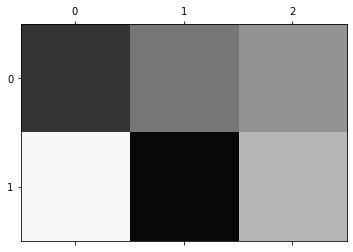

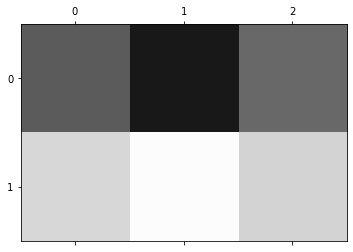

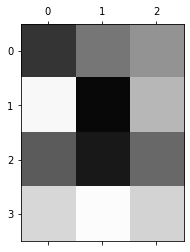

(None, None, None)

In [0]:
drawTensorEx(a),drawTensorEx(b),drawTensorEx(ab_cat)

In [0]:
torch.cat([a,b],dim=1)

tensor([[0.2064, 0.4631, 0.5818, 0.3558, 0.0938, 0.4100],
        [0.9689, 0.0322, 0.7156, 0.8409, 0.9861, 0.8314]])

In [0]:
#stack : 텐서를 쌓는다 -> 차원을 새로 만들어야 함 -> 차원추가
ab_stack = torch.stack([a,b],dim=0)
ab_stack.size()

torch.Size([2, 2, 3])

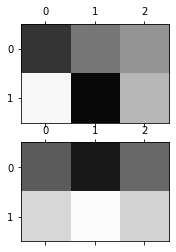

In [0]:
drawTensorEx(ab_stack)

## 텐서의 덧셈, 뺄셈, 곱셈, 내적(dot)

In [0]:
x=torch.Tensor([1,2,3])
y=torch.Tensor([4,1,2])
x,y

(tensor([1., 2., 3.]), tensor([4., 1., 2.]))

In [0]:
torch.add(x,y)

tensor([5., 3., 5.])

In [0]:
torch.sub(x,y), x-y

(tensor([-3.,  1.,  1.]), tensor([-3.,  1.,  1.]))

In [0]:
torch.mul(x,y), x*y

(tensor([4., 2., 6.]), tensor([4., 2., 6.]))

In [0]:
torch.div(x,y), x/y

(tensor([0.2500, 2.0000, 1.5000]), tensor([0.2500, 2.0000, 1.5000]))

In [0]:
#내적
#합성곱층에서 커널통과시켜 특성 추출할때의 계산과 동일
torch.dot(x,y), x.dot(y)

(tensor(12.), tensor(12.))

In [0]:
#텐서에 스칼라 연산, 각 원소에 일일이 연산하여 처리
x + 1

tensor([2., 3., 4.])

In [0]:
#행렬의 곱
#mm()
x=torch.Tensor([[1,3],[2,4],[5,7]]) #(3,2)
y=torch.Tensor([[7,9],[10,2]]) #(2,2)
#(3,2)mm(2,2)
torch.mm(x,y), x.mm(y)

tensor([[ 37.,  15.],
        [ 54.,  26.],
        [105.,  59.]])

## sum, mean

In [0]:
#(2,2,2)
z=torch.Tensor([1,2,3,4,5,6,7,8])
z.size(), z.shape
#z를 (2,2,2)로 만들어라
z=z.view(2,2,2)
z.size()

torch.Size([2, 2, 2])

In [0]:
z

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])

In [0]:
torch.sum(z, dim=0)

tensor([[ 6.,  8.],
        [10., 12.]])

In [0]:
torch.sum(z, dim=1)

tensor([[ 4.,  6.],
        [12., 14.]])

## max, min, argmax, argmin

In [0]:
torch.max(z), torch.min(z)

(tensor(8.), tensor(1.))

In [0]:
#그 값이 존재하는 위치값 -> 데이터를 flatten해서 인덱스 계산
#flatten(최대값, 최소값)기준으로 나열해서 인덱스
torch.argmax(z), torch.argmin(z)

(tensor(7), tensor(0))

In [0]:
#1차원 기준으로 원소들을 수직으로 배치하고, 위에서 내려봤을 때 같은 포지션에 겹치는 원소끼리의 최댓값따짐 -> 총 결과물이 4개가 나옴 -> 그 최대값과 위치값이 결과로 나옴
torch.max(z,dim=0)

torch.return_types.max(values=tensor([[5., 6.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]]))

In [0]:
torch.max(z,dim=1)

torch.return_types.max(values=tensor([[3., 4.],
        [7., 8.]]), indices=tensor([[1, 1],
        [1, 1]]))

In [0]:
torch.max(z,dim=-1)

torch.return_types.max(values=tensor(3.), indices=tensor(1))

## 논리연산

In [0]:
z=torch.Tensor([-4,3,0])
z

tensor([-4.,  3.,  0.])

In [0]:
#같다
print(z.eq(0))
print(z==0)

#크거나 같다
print(z.ge(0))
print(z>=0)

#작거나 같다
print(z.le(0))
print(z<=0)

#작다
print(z.lt(0))
print(z<0)

#크다
print(z.gt(0))
print(z>0)

tensor([False, False,  True])
tensor([False, False,  True])
tensor([False,  True,  True])
tensor([False,  True,  True])
tensor([ True, False,  True])
tensor([ True, False,  True])
tensor([ True, False, False])
tensor([ True, False, False])
tensor([False,  True, False])
tensor([False,  True, False])
